In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

# supress some warnings that mess up my slides
import warnings; warnings.simplefilter('ignore')

In [4]:
df = pd.read_csv('Portfolio 3.csv')
df.head(10)

,userId,timestamp,review,item,rating,helpfulness,gender,category
0,4259,11900,"Finally, Something for (Relatively) Nothing",MyPoints.com,like,4,F,Online Stores & Services
1,4259,12000,Shocking!,Sixth Sense,like,4,F,Movies
2,4259,12000,Simply Shaggadelic!,Austin Powers: The Spy Who Shagged Me,like,4,F,Movies
3,4259,12000,Better Than The First!,Toy Story 2,like,3,F,Movies
4,4259,12000,Blair Witch made me appreciate this,Star Wars Episode I: The Phantom Menace,dislike,4,F,Movies
5,4259,12100,Come here at least once in your life... stay a...,New York City,like,4,F,Hotels & Travel
6,4259,12400,"I joined for the free camera, and stood for no...",Earthlink,like,3,F,Online Stores & Services
7,4259,12700,They Should've Fooled the American Public,Blair Witch Project,dislike,4,F,Movies
8,4259,51600,A Short List of Things to Remember in NYC,New York City,like,4,F,Hotels & Travel
9,4259,60200,Do you know what a metaphysical can of worms t...,Being John Malkovich,like,4,F,Movies


In [5]:
# checking dataframe shape
print(df.shape)

(2899, 8)


In [6]:
# checking dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   userId       2899 non-null   int64 
 1   timestamp    2899 non-null   int64 
 2   review       2899 non-null   object
 3   item         2899 non-null   object
 4   rating       2899 non-null   object
 5   helpfulness  2899 non-null   int64 
 6   gender       2899 non-null   object
 7   category     2899 non-null   object
dtypes: int64(3), object(5)
memory usage: 181.3+ KB


In [7]:
#converting "userId" column into categorical 
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["userId_code"] = ord_enc.fit_transform(df[["userId"]])
df[["userId", "userId_code"]].head()

,userId,userId_code
0,4259,96.0
1,4259,96.0
2,4259,96.0
3,4259,96.0
4,4259,96.0


In [8]:
#converting "review" column into categorical 
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["review_code"] = ord_enc.fit_transform(df[["review"]])
df[["review", "review_code"]].head()

,review,review_code
0,"Finally, Something for (Relatively) Nothing",856.0
1,Shocking!,1985.0
2,Simply Shaggadelic!,2006.0
3,Better Than The First!,472.0
4,Blair Witch made me appreciate this,493.0


In [9]:
#converting "category" column into categorical 
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["category_code"] = ord_enc.fit_transform(df[["category"]])
df[["category", "category_code"]].head()

,category,category_code
0,Online Stores & Services,6.0
1,Movies,5.0
2,Movies,5.0
3,Movies,5.0
4,Movies,5.0


In [10]:
#converting "gender" column into categorical 
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["gender_code"] = ord_enc.fit_transform(df[["gender"]])
df[["gender", "gender_code"]].head()

,gender,gender_code
0,F,0.0
1,F,0.0
2,F,0.0
3,F,0.0
4,F,0.0


In [11]:
#converting "rating" column into categorical 
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["rating_code"] = ord_enc.fit_transform(df[["rating"]])
df[["rating", "rating_code"]].head()

,rating,rating_code
0,like,1.0
1,like,1.0
2,like,1.0
3,like,1.0
4,dislike,0.0


In [12]:
# checking dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userId         2899 non-null   int64  
 1   timestamp      2899 non-null   int64  
 2   review         2899 non-null   object 
 3   item           2899 non-null   object 
 4   rating         2899 non-null   object 
 5   helpfulness    2899 non-null   int64  
 6   gender         2899 non-null   object 
 7   category       2899 non-null   object 
 8   userId_code    2899 non-null   float64
 9   review_code    2899 non-null   float64
 10  category_code  2899 non-null   float64
 11  gender_code    2899 non-null   float64
 12  rating_code    2899 non-null   float64
dtypes: float64(5), int64(3), object(5)
memory usage: 294.6+ KB


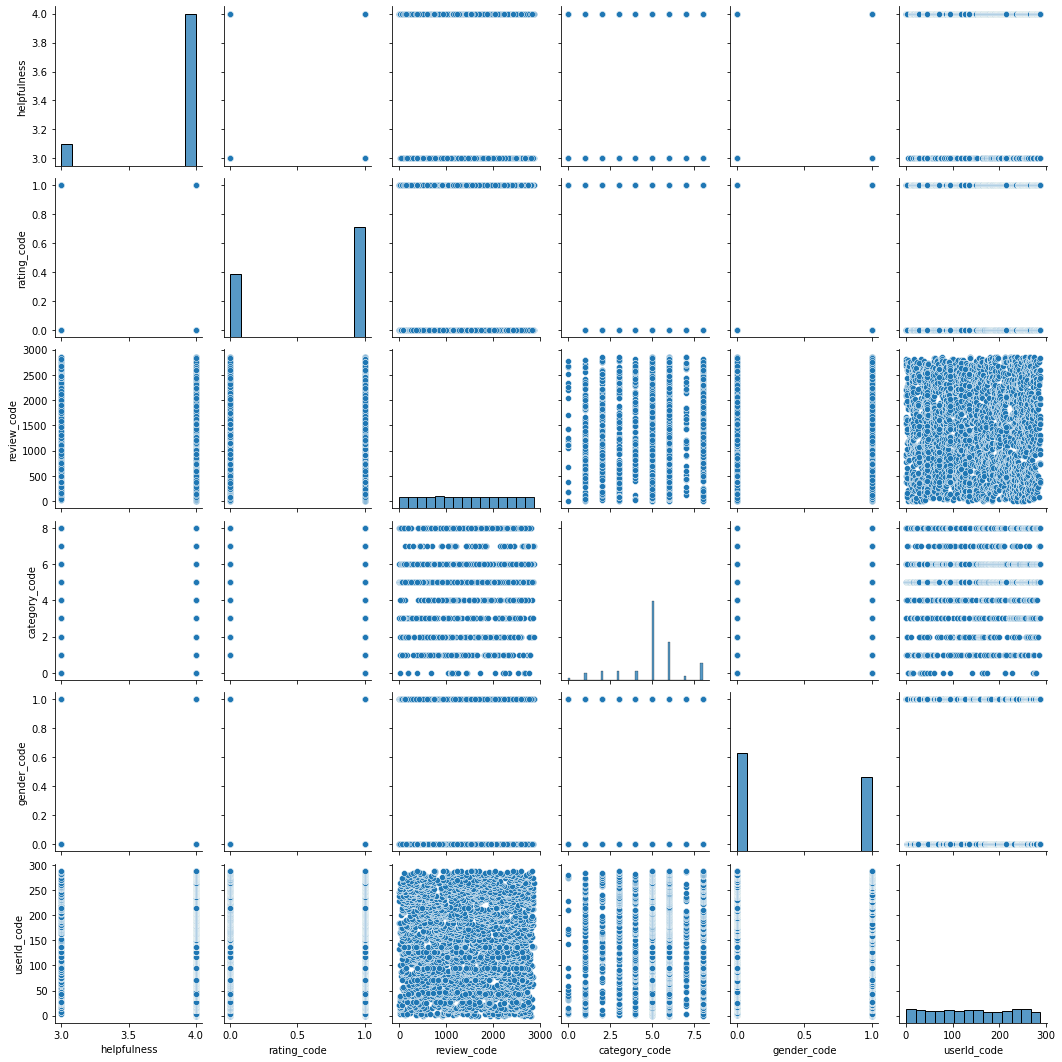

In [17]:
p = sns.pairplot(df[[ 'helpfulness', 'rating_code', 'review_code', 'category_code', 'gender_code', 'userId_code']])

In [18]:
df[['rating_code', 'category_code']].corr()

,rating_code,category_code
rating_code,1.000000,-0.116312
category_code,-0.116312,1.000000


In [20]:
df[['rating_code', 'category_code']].corr()

,rating_code,category_code
rating_code,1.000000,-0.116312
category_code,-0.116312,1.000000


In [19]:
df[['rating_code', 'review_code']].corr()

,rating_code,review_code
rating_code,1.000000,-0.046935
review_code,-0.046935,1.000000


In [21]:
df[['rating_code', 'gender_code']].corr()

,rating_code,gender_code
rating_code,1.000000,0.022576
gender_code,0.022576,1.000000


In [22]:
df[['rating_code', 'userId_code']].corr()

,rating_code,userId_code
rating_code,1.000000,0.004484
userId_code,0.004484,1.000000


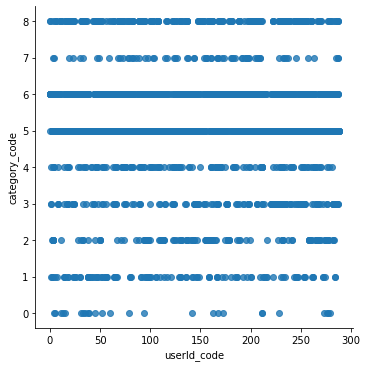

In [28]:
p = sns.lmplot( 'userId_code','category_code', df, height=5, fit_reg=False) #Plot data and regression model fits across a FacetGrid.

In [29]:
# create X and y
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
feature_cols = ['category_code']
X = df[feature_cols]
y = df['userId_code'] 

# import, instantiate, fit
from sklearn.linear_model import LinearRegression 
model = LinearRegression() #Ordinary least squares Linear Regression. 
reg=model.fit(X, y) #Fit linear model.
reg.score(X, y) #Return the coefficient of determination of the prediction.
                #The best possible score is 1.0 and it can be negative

0.00044792183847608413

In [30]:
print("y = ", model.coef_, "* x + ", model.intercept_) 

y =  [1.06627317] * x +  137.51261826748834


In [31]:
# Model predicts changes in product category for different users
# Intercept 137 - what does this mean?
# Coefficient of  𝑥  is 1.06
# an increase of number of categories predicts an increase of 1.06 Users

In [32]:
xmin = X.min()
ymin = model.coef_[0] * xmin + model.intercept_ #[0] means the value for the first feature
xmax = X.max()
ymax = model.coef_[0] * xmax + model.intercept_

In [33]:
print("Predicted value for x =", xmin[0], "is", model.predict([xmin]))
yhat = model.predict(X) #Predict using the linear model.
yhat

Predicted value for x = 0.0 is [137.51261827]


array([143.91025729, 142.84398412, 142.84398412, ..., 142.84398412,
       142.84398412, 142.84398412])

In [40]:
mse = ((y - model.predict(X))**2).mean() #y = df['user_code'] 
print(mse, np.sqrt(mse)) #mean squared error

7049.864600095138 83.963471820162


In [35]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
from sklearn.metrics import mean_squared_error, r2_score

predicted = model.predict(X)
print("MSE:", mean_squared_error(y, predicted))
print("R^2:", r2_score(y, predicted))

MSE: 7050.209489376603
R^2: 0.00044792183847608413


In [37]:
# create X and y
feature_cols = ['category_code', 'rating_code']
X = df[feature_cols]
y = df['userId_code']
 
model = LinearRegression()
reg2=model.fit(X, y)
reg2.score(X, y) #The best possible score is 1.0 and it can be negative

0.0004968189384222388

In [38]:
print("y = ", model.coef_, "* x + ", model.intercept_) 

y =  [1.10752959 1.23021973] * x +  136.5201290391904


In [41]:
mse = ((y - model.predict(X))**2).mean() #y = df['user_code'] 
print(mse, np.sqrt(mse)) #mean squared error

7049.864600095138 83.963471820162


In [42]:
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
from sklearn.metrics import mean_squared_error, r2_score

predicted = model.predict(X)
print("MSE:", mean_squared_error(y, predicted))
print("R^2:", r2_score(y, predicted))

MSE: 7049.864600095119
R^2: 0.0004968189384222388


In [44]:
feature_cols = ['category_code', 'rating_code']
X = df[feature_cols]
y = df['userId_code']

X_train = X[:30] #from start to 30 rows
print(X_train)
y_train = y[:30]
X_test = X[30:] #from 30 to the end of rows
print(X_test)
y_test = y[30:]

    category_code  rating_code
0             6.0          1.0
1             5.0          1.0
2             5.0          1.0
3             5.0          1.0
4             5.0          0.0
5             2.0          1.0
6             6.0          1.0
7             5.0          0.0
8             2.0          1.0
9             5.0          1.0
10            1.0          1.0
11            5.0          1.0
12            5.0          1.0
13            5.0          1.0
14            5.0          1.0
15            1.0          1.0
16            5.0          1.0
17            1.0          1.0
18            5.0          1.0
19            5.0          1.0
20            5.0          1.0
21            5.0          0.0
22            5.0          1.0
23            6.0          1.0
24            5.0          1.0
25            7.0          1.0
26            6.0          1.0
27            2.0          1.0
28            2.0          1.0
29            2.0          1.0
      category_code  rating_code
30    

In [45]:
model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, predicted))
print("R^2:", r2_score(y_test, predicted))

MSE: 9283.664987680331
R^2: -0.3066915687351597


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #20% for test
print(X_train.shape, X_test.shape)

(2319, 2) (580, 2)


In [47]:
model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, predicted))
print("R^2:", r2_score(y_test, predicted))# Set up an experiment with the birth data
feature_cols = np.array(['smoker', 'motherage', 'mheight', 'Gestation', 'fheight', 'mppwt', 'fage', 'fedyrs', 'fnocig'])
X = birth[feature_cols]
y = birth['Birthweight']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

MSE: 6999.8578883856035
R^2: -0.005060529858786245


In [48]:
feature_cols = ['category_code', 'rating_code']
X = df[feature_cols]
y = df['userId_code']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
predicted = model.predict(X_test)
print("y = ", model.coef_, "* X + ", model.intercept_)
print("MSE:", mean_squared_error(y_test, predicted))
print("R^2:", r2_score(y_test, predicted))

y =  [ 0.92779855 -0.33158043] * X +  140.10739167861
MSE: 7042.213575286695
R^2: -0.009774575895100446


In [50]:
# Set up an experiment with the Ratings
feature_cols = np.array(['helpfulness', 'review_code', 'category_code', 'gender_code', 'userId_code'])
X = df[feature_cols]
y = df['rating_code']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
from sklearn.feature_selection import RFE

estimator = LinearRegression()
selector = RFE(estimator, 6)  # select 6 features for us
selector = selector.fit(X, y)

supp = selector.get_support() #https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html#sklearn.feature_selection.SelectFromModel.get_support
print("Selected features:", feature_cols[supp])
print("Coeffs:", selector.estimator_.coef_)
# test the model
predicted = selector.predict(X)
print("MSE:", mean_squared_error(y, predicted))
print("R^2:", r2_score(y, predicted))

Selected features: ['helpfulness' 'review_code' 'category_code' 'gender_code' 'userId_code']
Coeffs: [-2.21460680e-02 -2.62891863e-05 -3.33240395e-02  1.82608686e-02
  3.73795460e-05]
MSE: 0.22725051836380158
R^2: 0.016271841312637703


In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

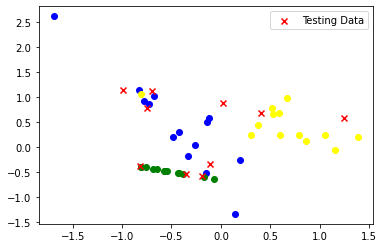

In [61]:
# Generate a synthetica 2D dataset
X, y = make_classification(n_samples=50, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=3, n_clusters_per_class=1, 
                           weights=None, flip_y=0.01, class_sep=0.5, hypercube=True,
                           shift=0.0, scale=1.0, shuffle=True, random_state=None)

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)


# Visualize the generated data
colors = ['blue', 'yellow', 'green']
for i, color in enumerate(colors):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], c=color)
plt.scatter(X_test[:, 0], X_test[:,1], c='red', marker='x', label='Testing Data')
plt.legend(loc='best')
plt.show()

In [64]:
# Create and training a KNN classifier model
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train, y_train)

# Use the model to predict testing data
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
print('Testing accuracy is: ', accuracy)

Testing accuracy is:  0.9


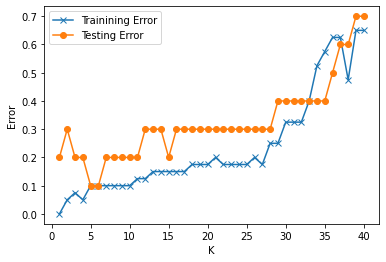

In [65]:
# Plot the accurcy trend w.r.t. K
training_error=list()
testing_error=list()

for i in range(1, 41):
    clf = KNeighborsClassifier(n_neighbors = i)
    clf.fit(X_train, y_train)
    training_error.append(1.0-accuracy_score(clf.predict(X_train), y_train))
    testing_error.append(1.0-accuracy_score(clf.predict(X_test), y_test))

# Plot the relationship
plt.plot(range(1, 41), training_error, marker='x', label='Trainining Error')
plt.plot(range(1, 41), testing_error, marker='o', label='Testing Error')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend(loc='best')
plt.show()

In [68]:
# Create a KNN classifier model and use k-fold cross validation for testing accuracy estimation
clf = KNeighborsClassifier(n_neighbors = 5)
scores = cross_val_score(clf, X, y, cv=10)
print('Accuracy for each round: \n', scores)
print('Average accuracy: %.4f +- %.4f' % (scores.mean(), scores.std()))

Accuracy for each round: 
 [0.8 1.  0.8 0.8 1.  0.8 0.6 1.  1.  1. ]
Average accuracy: 0.8800 +- 0.1327


In [70]:
# Define search space for parameters
parameter_grid = {'n_neighbors': range(1, 41)}

# Create the machine learning model
knn_clf = KNeighborsClassifier()
clf = GridSearchCV(knn_clf, parameter_grid, scoring='accuracy', cv=10)
clf.fit(X, y)

# Identify the best parameter(s)
print('Best K value: ', clf.best_params_['n_neighbors'])
print('The accuracy: ', clf.best_score_)

Best K value:  4
The accuracy:  0.9


In [ ]:
# We have used both KMeans and Logestic Regression
# KMeans classification is much better to understand and provide accurate readable results.
# Logestic Regression is a method to evaluate and predict the features by correlation method and to further visualize and make an assumption KMeans is better.
